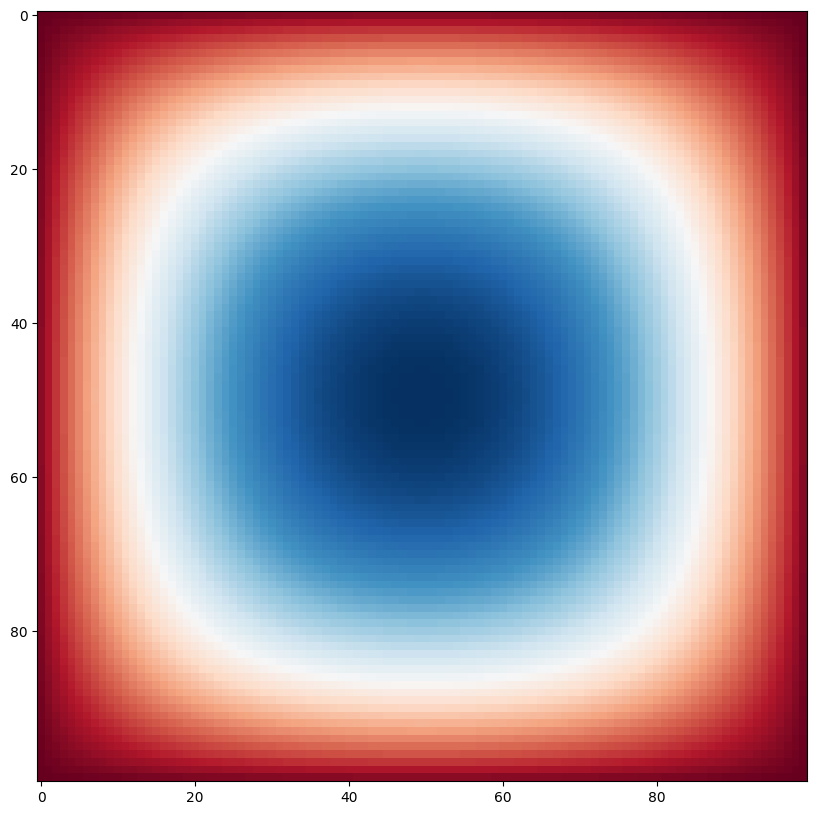

In [19]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as lin
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

from matplotlib import cm

# bestem antall punkter i gitteret i x-retning
m = 100

a = 5
b = 5

# hvor tykt er luftlaget
c = 0.5

# setter m+2 punkter mellom -a-c og a+c
# m+2 fordi vi teller ikke randene -a og a
x = np.linspace(-a-c,a+c,m+2)

# avstand mellom punktene
h = x[1] - x[0]
m1 = int(c/h)

# antall punkter i gitteret i y-retning
n = 100

# hvor tykt er luftlaget
d = 0.5

# setter n+2 punkter mellom -b-d og b+d
y=np.linspace(-b-d,b+d,n+2)

# avstand mellom punktene
k = y[1] - y[0]
n1 = int(d/k)

def euler(f, u0, t0, tf, n):
    t = np.linspace(t0, tf, n+1)
    dt = t[1] - t[0]
    u = np.zeros((n+1, len(u0)))
    u[0, :] = u0
    for i in range(n):
        u[i+1, :] = u[i, :] + dt * f(u[i, :], t[i])
    return u, t

# alpha = kappa/(rho.cp); kappa er termisk konduktivitet, rho er tetthet, cp er spes. varmekap
# alpha=1 i materialet som skal varmast og alpha=0.1 i luft
alpha_gas = 0.1
alphas_m = np.ones(m)
alphas_n = np.ones(n)
alphas_m[:m1]=alpha_gas
alphas_m[-m1:]=alpha_gas
alphas_n[:n1]=alpha_gas
alphas_n[-n1:]=alpha_gas
B1 = sp.diags(alphas_m)
B2 = sp.diags(alphas_n)

# setter opp matrise tilsvarende Poissonligning i x-retning
L1 = (1/h**2)*B1 @ sp.diags([1, -2, 1],[-1, 0, 1],shape=(m, m))
# identitetsmatrise i x-koordinatene
I1 = sp.eye(m)
# setter opp matrise tilsvarende Poissonligning i y-retning
L2 = (1/k**2)*B2 @ sp.diags([1, -2, 1], [-1, 0, 1], shape=(n, n))
# identitetsmatrise i y-koordinateneI2 = sp.eye(n)
I2 = sp.eye(n)
# setter sammen matrisa med Kroneckerproduktet
A = sp.kron(L1,I2) + sp.kron(I1,L2)

# Randbetingelsene
Zm_l = np.zeros(m)
Zm_l[0] = -1/(h**2)
Zm_r = np.zeros(m)
Zm_r[-1] = -1/(h**2)
Zn_l = np.zeros(n)
Zn_l[0] = -1/(k**2)
Zn_r = np.zeros(n)
Zn_r[-1] = -1/(k**2)

def ute(x):
   return 200

ute = np.vectorize(ute)
F = sp.kron(ute(x[1:-1]),Zn_l) + sp.kron(ute(x[1:-1]),Zn_r) + sp.kron(Zm_l,ute(y[1:-1])) + sp.kron(Zm_r,ute(y[1:-1]))


# Løsning
def f(x,t):
    return A @ x - F

X, Y = np.meshgrid(x[1:-1],y[1:-1])
u0 = 20 + np.zeros(m*n)
u, t = euler(f, u0, 0, 10, 10000)
fig, ax = plt.subplots(figsize=(15,10))

ims = []
for i in range(40):
    im = ax.imshow(-np.reshape(u[100*i,:],(m,n)),cmap='RdBu', animated=True)
    if i == 0:
        ax.imshow(-np.reshape(u[0,:],(m,n)),cmap='RdBu') # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

HTML(ani.to_jshtml())

Text(0.5, 0.92, '3D Plot')

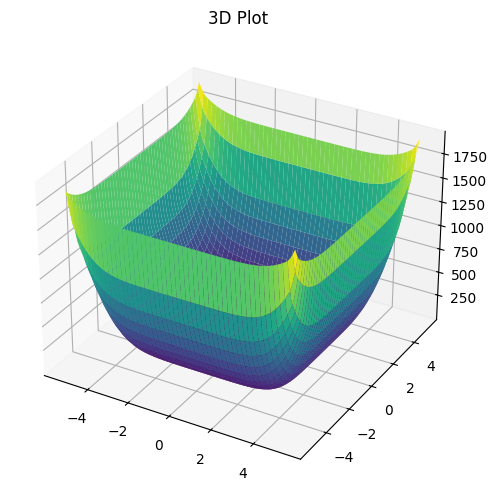

In [20]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(131, projection="3d")
Z = np.reshape(u[1000, :], (m, n))
surf = ax1.plot_surface(np.transpose(X), np.transpose(Y), Z, cmap=cm.viridis)
ax1.set_title("3D Plot")

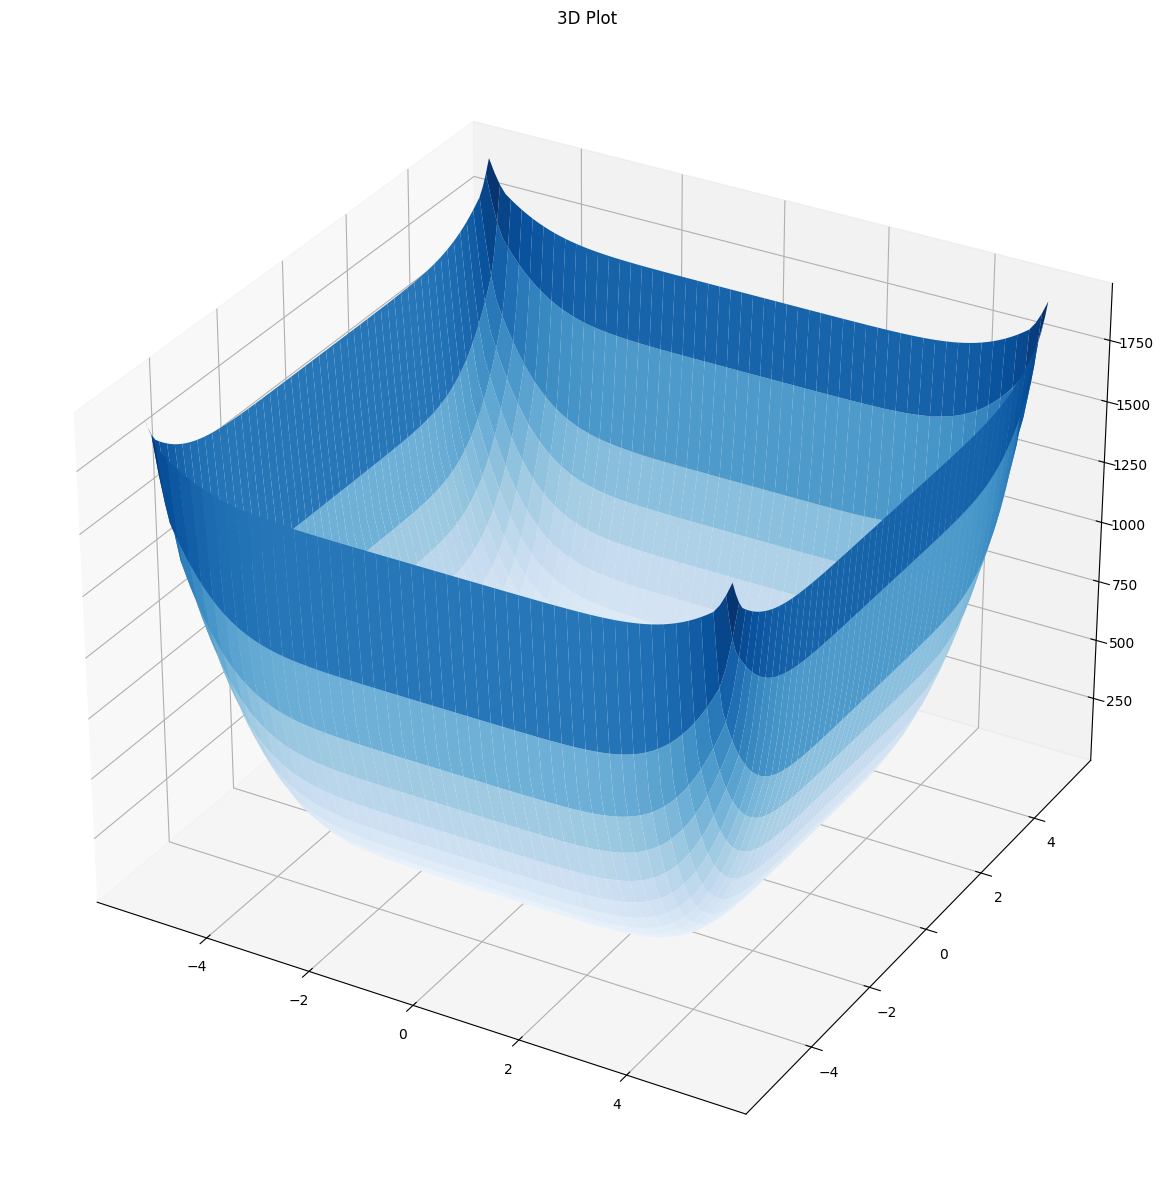

In [21]:
fig, ax2 = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15, 15))
Z = np.reshape(u[1000, :], (m, n))
ax2.plot_surface(np.transpose(X), np.transpose(Y), Z, cmap=cm.Blues)
ax2.set_title("3D Plot")
plt.show()